# P-ai AI/ML Workshop: Session 2

Welcome to P-ai's second session of the AI/ML workshop series! Today we'll learn about
- Supervised learning, unsupervised learning, and reinforcement learning
- Supervised learning in more detail
- Linear regression and logistic regression

And we'll finish off with a case study that will allow us to apply what we've learned.
<img src="https://images.squarespace-cdn.com/content/5d5aca05ce74150001a5af3e/1580018583262-NKE94RECI46GRULKS152/Screen+Shot+2019-12-05+at+11.18.53+AM.png?content-type=image%2Fpng" width="200px">

### Some extensions from last week: Polynomial Degrees

## 0. Session 1 Review
Here are some key points from last week's session:
- Machine learning is a tool used for finding finding patterns in data, typically in order to make predictions or perform a task without being explicitly programmed
- Often, a machine learning algorithm requires finding a set of *parameters* that optimizes some metric (like minimizing error)
- Applying machine learning requires many steps of data collection, processing, training, and evaluating

## 1. Domains of Machine Learning
Let's outline three of the biggest "domains" of machine learning tasks we should be aware of:

Let's break down the three biggest branches: **supervised learning**, **unsupervised learning**, and **reinforcement learning**.

### Supervised learning
Supervised learning requires **labeled data**, that is, the training data consists of inputs and known correct outputs. This is the "bread and butter" kind of machine learning you will most likely come across. Here are a few examples:
- Given a dataset of flower measurements and their corresponding species, learn to classify a flower's species from its measurements
- Given a dataset of 32x32 images of handwritten digits, learn to classify an image as one of ten digits
- Given a dataset of house pictures and their prices, learn to predict the price of a house given a picture

In all these cases, we have lots of examples of the "correct answers", and need a machine learning model to learn what function maps from input to output. More on this later!

### Unsupervised learning
Unsupervised learning deals with **unlabeled data**, and the two most common tasks in the unsupervised learning space is clustering and dimensionality reduction. We'll cover these in more detail later, but to give an idea of what UL is about, let's consider clustering. As the name might suggest, the task of clustering involves taking a bunch of data points and grouping them together into clusters. We don't need labels to perform this!

For example, a simple implementation of online-shopping purchase recommendations is with clustering. By simply grouping together items that are commonly purchased together, or by looking at what buyers are also purchasing upon purchasing the first item, we can develop a method to recommend products.

### Reinforcement Learning (RL)
Reinforcement learning is a little different from supervised and unsupervised learning. RL involves training an **agent** to **interact with an environment** to maximize some reward. In other words, the agent can perform actions which change the environment and yield some reward or punishment. In theory, this is a simplified model of how humans learn (think touching a hot stove, or being rewarded for good grades). The most classic examples of RL are models that play games like Go (see <a href="https://deepmind.com/research/case-studies/alphago-the-story-so-far">AlphaGo</a>) or Mario. RL can be more nuanced, though, like stock trading or learning language.

## 2. Supervised Learning

Supervised learning is a great place to start with machine learning because it explains most of the most fundamental concepts behind ML, is very applicable, and allows us to start simple. Before going further, let's break down the two big subdomains of supervised learning:

<img src="https://lh4.googleusercontent.com/K17BRCQTR5hHU-qOthrs9KIQa4DLAWJh5jeXkyn6NZRQfimHnCAadWbw3EaZPZl1bit2IBQPeBv1CZURiyFYkIDPH1Z3Pb0O_qkeS9av7vrEtQLpMLWdtDJ7YNlRki8CoAsY8bmn" width="450px">

- **Regression** is about predicting a **quantity**; in the example above, temperature. Another example might be predicting someone's age given a picture of their face.
     - Regression is broader than you think...
- **Classification** is about assigning a **class** (or label) to a given data point; in the example above, "hot" or "cold". Another example might be classifying paintings as Da Vinci, Van Gogh, or Dali.

Recall how we said supervised learning requires **labeled data**. Let's call the input data $X$ and the output data (what we're trying to predict) $y$. In the most gross oversimplification of machine learning, supervised learning is about finding a function $f$ such that:

$$f(X) \approx y$$

That may sound obvious and/or unhelpful, but just keep it in mind as we continue through today's session, and especially when we cover deep learning; we are *using an algorithm to find a mapping from input to output*!

### A slight segway into recent controversies... Sentient AI!
https://www.theguardian.com/technology/2022/aug/14/can-artificial-intelligence-ever-be-sentient-googles-new-ai-program-is-raising-questions

Okay, let's start getting into the weeds a bit!

## 3. Linear Regression and Logistic Regression

- **Q.** *Why?*  
- **A.** These two algorithms are relatively simple but teach a lot about core machine learning concepts, and also serve as the foundation for deep learning.

## Linear Regression

If you attended last week's session or looked over the notebook, you'll remember that we quickly covered linear regression. But this time, it's for real. Recall that for linear regression in 2D, we try to fit a line to the data. That means, if we have an input variable $x$ and an output variable $y$, we wanted to find parameters $m$ and $b$ so we could get:

$$f(x) = mx + b \approx y$$

So we have something to look at, let's generate some fake data!

In [1]:
# Install packages we'll need later
!pip install pandas seaborn scikit-learn numpy

You should consider upgrading via the 'c:\users\txiang\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
# Import helpful modules
import pandas as pd
import seaborn as sns
from pathlib import Path
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:>

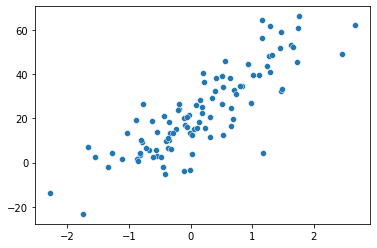

In [31]:
# scikit-learn has a function for generating roughly linear data
bias = 20
X, y, coef = datasets.make_regression(n_features=1, noise=10, bias=bias, coef=True, random_state=52)
# don't worry about this
x = [x_[0] for x_ in X]
sns.scatterplot(x=x, y=y)

#### Activity 1:

Mess with the datasets.make_regression function. What does n_features, noise, bias, and coef do? What does random_state do?

If you want to make this more concrete, imagine that the $x$ axis is the average salary in a particular city, and the $y$ axis is the average cost of living for that city. Your boss hears you "know machine learning", so they ask you to "use AI" to predict the cost of living for a city given the average salary. Since we can see the relationship is linear, and we're trying to predict a **value** (regression, not classification), linear regression is a good choice.

### An ML Spin on Linear Regression
Imagine you're the machine, and you want to learn how to model that relationship between salary and cost of living. What do you need to figure out? Recall the formula:
$$
\hat{y}=mx+b
$$

or as we'll write it...

$$
\hat{y}=wx+b
$$

Don't mind the change from slope variable $m$ to $w$. We'll start to slide over to ML lingo, where we call the slope **weight**. This makes sense, because when we multiply a variable by an amount, we're basically assigning a *weight* to that variable. Also, instead of calling $b$ the y-intercept, we call it the **bias**. So in this case, we, the machine, have to figure out what $w$ and $b$ are from the data alone.

> Where do we start?

How about a random guess?

In [35]:
def defineLinearModel(w, b):
    # Note that defineModel returns a function!
    # write a function under defineLinearModel called model(x) that takes in some x 
    # and returns a predicted linear regression value
    def model(x):
        return w * x + b
    return model
    
# Define our model with w (weight) = 2 and b (bias) = 10
model = defineLinearModel(2, 10)
# Here's our prediction for x = 5
model(5)

20

Now let's make predictions for all the $x$ data in our dataset:

In [36]:
y_pred = [model(x_) for x_ in x]
# Print first 10
y_pred[:10]

[10.162789374580534,
 9.783856724743945,
 9.615122789118002,
 14.930217758872587,
 9.77319132379943,
 12.304368192557357,
 11.679614726891657,
 8.914365934713326,
 12.479590834038854,
 10.613949582231808]

Let's compare our predictions with the actual y values:

In [34]:
# Just putting our variables into a table for readability
df = pd.DataFrame(columns=["x", "y_pred", "y"], 
                  data={
                      "x": x, 
                      "y_pred": y_pred, 
                      "y": y
                  })
df

,x,y_pred,y
0,0.081395,10.162789,26.237272
1,-0.108072,9.783857,20.015537
2,-0.192439,9.615123,24.014090
3,2.465109,14.930218,49.119550
4,-0.113404,9.773191,-3.770025
...,...,...,...
95,-0.066157,9.867685,20.387742
96,1.319828,12.639656,48.705636
97,-0.323021,9.353958,6.073753
98,-0.484149,9.031701,2.524269


> What now?

We guessed our parameters and made predictions for all our $x$ values. We need to know **how bad** our predictions were compared to the actual known $y$ values.

> How should we compare them?

One simple idea might be to take the absolute difference between the two, and call it the error. Here's what that would look like:

In [37]:
df["error"] = (df["y_pred"] - df["y"]).apply(abs)
df

,x,y_pred,y,error
0,0.081395,10.162789,26.237272,16.074482
1,-0.108072,9.783857,20.015537,10.231680
2,-0.192439,9.615123,24.014090,14.398967
3,2.465109,14.930218,49.119550,34.189332
4,-0.113404,9.773191,-3.770025,13.543216
...,...,...,...,...
95,-0.066157,9.867685,20.387742,10.520056
96,1.319828,12.639656,48.705636,36.065981
97,-0.323021,9.353958,6.073753,3.280205
98,-0.484149,9.031701,2.524269,6.507432


We could then average together all these errors to distill our predictions down to one number that represents the "badness" of our model.

In [38]:
df["error"].mean()

16.39407059165571

This works, but a more common choice for regression is **mean squared error**, or **MSE**. All it does is take the square of the difference between predicted and actual values, and then takes the mean across all predictions. Also, to slip into some more machine learning terminology, we'll call the resulting value **loss** instead of error, and the function that produces loss (in this case, MSE) our **loss function**. If you're interested, here's the formal definition of MSE:
$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}{(\hat{y}_i-y_i)^2}
$$

##### Discussion Question: Why not just stick with absolute error?

In [39]:
# Use ML lingo
df = df.rename(columns={"error": "loss"})

In [43]:
# Take the difference, then square
# Activity 2: Try implementing mean squared error with pandas! Place your outputs into a new column called ["loss"]
# Your predictions are df["y_pred"], the actual values are df["y"]
df["loss"] = (df["y_pred"] - df["y"]).map(lambda x: x**2)
df

,x,y_pred,y,loss
0,0.081395,10.162789,26.237272,258.388985
1,-0.108072,9.783857,20.015537,104.687285
2,-0.192439,9.615123,24.014090,207.330246
3,2.465109,14.930218,49.119550,1168.910409
4,-0.113404,9.773191,-3.770025,183.418697
...,...,...,...,...
95,-0.066157,9.867685,20.387742,110.671588
96,1.319828,12.639656,48.705636,1300.754963
97,-0.323021,9.353958,6.073753,10.759747
98,-0.484149,9.031701,2.524269,42.346677


In [44]:
df["loss"].mean()

456.404060646876

There's our loss! Let's try a different set of parameters and see if we increase or decrease the loss:

In [45]:
# New model: w = 10 and b = 15
model_2 = defineLinearModel(10, 15)
# Make predictions (inference)
df["y_pred"] = [model_2(x_) for x_ in df["x"]]
# Calculate loss (MSE)
df["loss"] = (df["y_pred"] - df["y"]).map(lambda x: x**2)
df["loss"].mean()

185.11241518331036

Nice! By tweaking our model's parameters, we can decrease the loss.

> So what?

Remember from last week's session that machine learning is built on the idea that *learning* is roughly equivalent to *minimizing some cost* (or conversely, increasing some reward). This makes intuitive sense, because the closer the loss gets to 0, the closer the model's predictions are to the true values, so we would say the model has "learned" the data. That means that the machine learning model's job is to **find the parameters that minimize the loss**.

> How do machine learning models find those optimal parameters?

That is a very important question with an equally important question, but we'll have to save for next session in the interest of time :) For now, just know that there's a process that many machine learning algorithms use to find those parameters.

Let's use `scikit-learn`'s <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression</a> model to fit our generated data.

In [46]:
# Just to remember what our data looks like
for i in range(10):
    print(f"{X[i]} => {y[i]}")

[0.08139469] => 26.237271800564137
[-0.10807164] => 20.015537186266776
[-0.19243861] => 24.014089644407456
[2.46510888] => 49.119549558537244
[-0.11340434] => -3.7700245735677385
[1.1521841] => 64.3306595003543
[0.83980736] => 34.51937071773668
[-0.54281703] => 3.015369847903938
[1.23979542] => 43.79286019613222
[0.30697479] => 20.416206766201885


In [47]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

Yep, that's right. All it took was to call `.fit()`. When we called `.fit()`, the model followed the linear regression algorithm to determine which parameters (namely, one weight and a bias) minimized the loss. Just to prove I'm not pulling this out of thin air, check out this line taken directly from the documentation (linked above):
> LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

Remember, learning (in ML) is nearly always about optimizing some value– in this case, sum of squares (almost the same as mean squared error, the difference is just a factor of $n$).

Let's have a look at which parameters the model settled on:

In [48]:
print(f"The calculated weight is {reg.coef_[0]}")
print(f"The calculated bias is {reg.intercept_}")

The calculated weight is 17.1678481577581
The calculated bias is 20.003846977312833


And to compare these values to the "correct" ones:

In [49]:
print(f"The 'actual' weight is {coef}")
print(f"The 'actual' bias is {bias}")

The 'actual' weight is 16.681383022164674
The 'actual' bias is 20


Very close! Since the generated data has some noise associated with it, this is likely as close as we could possibly get. Let's run some inference and check that our predictions are close:

In [ ]:
# Make predictions (inference)
df["y_pred"] = reg.predict(X)
# Calculate loss (MSE)
df["loss"] = (df["y_pred"] - df["y"]).map(lambda x: x**2)
df

And, let's plot the line:

In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color="red")

In [ ]:
sns.scatterplot(x=x, y=y)
abline(reg.coef_[0], reg.intercept_)
plt.show()

Looks right!

### When is Linear Regression Not a Good Idea?

This one won't come as much of a surprise- don't use linear regression if your data isn't roughly linear! Let's see what happens if you try:

In [ ]:
# Generate quadratic data
def quadratic(x):
    return 2 + 3 * (x - 4)**2

X_quad = np.arange(-20, 20)
y_quad = [quadratic(x) for x in X_quad]

sns.scatterplot(x=X_quad, y=y_quad)
plt.show()

In [ ]:
# Fit a linear model
reg_quad = LinearRegression().fit(np.expand_dims(X_quad, axis=-1), y_quad)

In [ ]:
# Visual check
sns.scatterplot(x=X_quad, y=y_quad)
abline(reg_quad.coef_[0], reg_quad.intercept_)
plt.show()

### Activity 3: 
Generate some data with different polynomial degrees. Perform linear regression and see what happens as your degrees increase. Test your results with mean squared error that has been implemented below

In [ ]:
def mean_squared_error(predictions, actual):
    return (predictions - actual) ** 2

In [ ]:
X_test = np.arange(-20, 20)

Sorry, not even close. But that was literally the best it could do!

This gets at a larger point about machine learning. Soon, you'll know about a dozen different machine learning algorithms, which is awesome! But you need to also remember the strengths and weaknesses of each one. For example, linear regression model will never truly learn non-linear data.

### Generalizing!

We're about to do something pretty cool. Just by reframing how we think of a linear regression model, we'll find ourselves at the doorstep of deep learning! First, let's visualize a linear regression model like this:

<img src="images/lin_reg_1d.png" width="350px">

We have one input variable, $x$, and one output variable $y$. We multiply $x$ by its weight $w$, and add the bias $b$ to get our output variable. Simple enough, right? What if we had multiple input variables? What would that look like?
Mathematically, we would be going from

$$
wx + b = y
$$
to
$$
w_1x_1 + w_2x_2 + ... + w_nx_n + b = y
$$

If you think about that, it should make sense. Each variable $x_i$ deserves their own weight (how much, and in which direction does that variable affect the output variable $y$?), and we still need a bias that doesn't depend on any of the inputs. Here's how we can visualize it:

<img src="images/lin_reg_nd.png" width="350px">

Just to show you how this could be done with code, let's use the same `scikit-learn` data generator function to generate 3D input data:

In [ ]:
# 3D input => scalar output
X_2, y_2 = datasets.make_regression(n_features=3, noise=10, bias=20, random_state=43)
# Print first 10
for i in range(10):
    print(f"{X_2[i]} => {y_2[i]}")

In [ ]:
# Just like before, we can fit a linear regression model to this data
reg_2 = LinearRegression().fit(X_2, y_2)
print(f"Weights: {reg_2.coef_}")
print(f"Bias: {reg_2.intercept_}")

Notice how there's **three** weights; one for each input variable! Like always, we can make predictions using this model.

In [ ]:
input_x = np.array([[-0.5, 1, 0.25]])
print(f"Input X: {input_x}")
pred = reg_2.predict(input_x)
print(f"Prediction: {pred}")

## Case Study
Now that we've dealt with the theory, let's see what linear regression is like in practice!

We'll be dealing with real estate data, so let's go ahead and import the data into the variable `house_data`. Don't worry about all of the `pandas` (`pd`) stuff, the comments will explain what each step is doing; the main focus is on the machine learning.

In [50]:
# Load data from csv (comma separated values) file into a pandas DataFrame
# A DataFrame is basically a table
house_data = pd.read_csv("data/houses.csv")
house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


As you can see, there are a lot of houses (1460), each of which has 81 features, like the total lot area and the price it sold for.

In [51]:
# List all columns
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

You can see exactly what each variable means in `data/houses.txt`.

### Regression

Let's try to predict sale price from the overall quality (`1-10`) and lot area. First, we should visualize our variables.

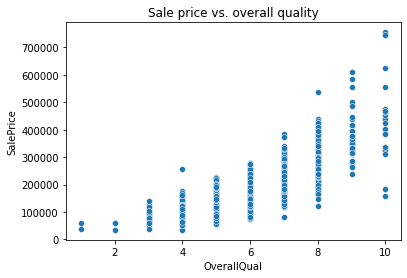

In [52]:
sns.scatterplot(x=house_data["OverallQual"], y=house_data["SalePrice"])
plt.title("Sale price vs. overall quality")
plt.show()

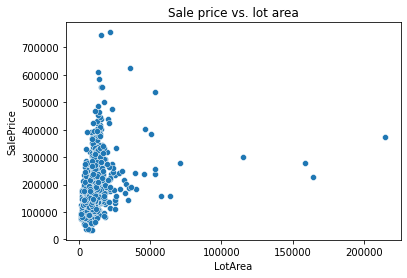

In [53]:
sns.scatterplot(x=house_data["LotArea"], y=house_data["SalePrice"])
plt.title("Sale price vs. lot area")
plt.show()

We can see there's a bunch of outliers; properties with *huge* lot areas. 
#### Discussion Question: What should we do about these properties with *huge* areas? Do we just leave them as is?

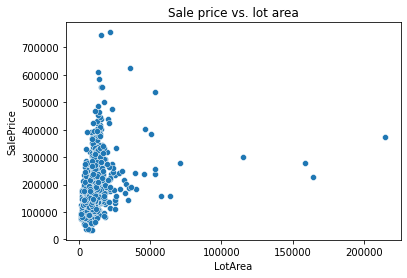

In [54]:
sns.scatterplot(x=house_data["LotArea"], y=house_data["SalePrice"])
plt.title("Sale price vs. lot area")
plt.show()

Better! For completeness, let's plot lot area against overall quality.

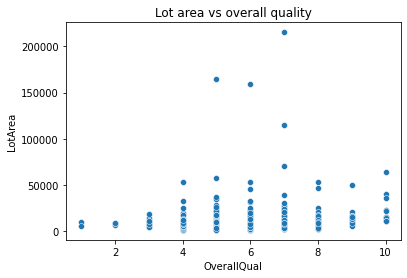

In [55]:
sns.scatterplot(x=house_data["OverallQual"], y=house_data["LotArea"])
plt.title("Lot area vs overall quality")
plt.show()

Both variables seem to have a positive association with the sales price, although there's a few asterisks. `SalePrice vs LotArea` has a **lot** of variance, and overall quality is a discrete quantity, so we should keep in mind not to use non-integer qualities or qualities outside of the range 1 to 10. There's no glaring red flags, though, so we can probably continue. What's also interesting is that lot area and overall quality don't seem to be particularly associated, which is a good thing- that means they each bring unique information that can help with the regression.

Before we pull out the good old `.fit()`, let's split up our data into a **training** and **test** set. We'll use the training set to train the model, and test set to evaluate it. We'll go over why this is so important next session, but hopefully it makes sense why we'd want to do that.

In [56]:
from sklearn.model_selection import train_test_split
X_data = house_data[["LotArea", "OverallQual"]]
y_data = house_data["SalePrice"]
# Separate X and y data into training and test sets; use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=45)

Now we can fit our linear regression model on the training data.

In [57]:
model = LinearRegression()
# Fit model
model.fit(X=X_train, y=y_train)

LinearRegression()

To see how well it did, we can check the $R^2$. $R^2$ basically represents the percent of variance in the output variable that's explained by our regression line. $R^2=0$ means that our model explains literally none of the variance in the output variable, and $R^2=1$ means our model explains all of it (i.e. perfectly predicts every target). As a rule of thumb, $R^2 > 0.75$ is considered "pretty good".

In [59]:
# R^2 on training set
model.score(X=X_train, y=y_train)

0.6489474536696604

The training score doesn't really tell us much though, we want to check its performance on data it *hasn't* seen before: the test set.

In [60]:
model.score(X=X_test, y=y_test)

0.694971013737929

Alright! It's not a fantastic score, but it's not a terrible one either. It looks like we can roughly predict the price of a house given its lot area and overall quality.

In [62]:
lot_size = 10000
quality = 5

print(f"Lot area (sq. ft.): {lot_size}")
print(f"Overall quality (1-10): {quality}")

# Order matters! Needs to match what it learned from X_train
pred = model.predict([[lot_size, quality]])
print(f"The model predicts that this house will sell for ${round(pred[0])}")

Lot area (sq. ft.): 10000
Overall quality (1-10): 5
The model predicts that this house will sell for $132175


c:\Users\TXiang\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Cool! Let's move on to logistic regression...

### Logistic Regression

The first thing to know about logistic regression is that it's **used for classification, not regression tasks**. This probably seems confusing given "regression" is literally in the name, but we can explain that in a second. Let's take a quick second to remember what the difference between regression and classification is:

<img src="https://www.researchgate.net/profile/Yves-Matanga/publication/326175998/figure/fig9/AS:644582983352328@1530691967314/Classification-vs-Regression.png" width="500px">

While regression tries to fit a line or curve to the data, classification seeks to *label* or *classify* data points as belonging to one class or another. Whenever you're performing classification, you're either directly or indirectly creating a **decision boundary**, which separates one class from another (that's what's being illustrated above).

It's also worth noting that classification is usually further broken down into a few types:
- **Binary classification**: there are only two possible classes
    - e.g. Identifying tumors from brain scans; 0 = no tumor detected, 1 = tumor detected
- **Multiclass classification**: there are three or more possible classes
    - e.g. Identifying dog breeds from pictures; could have dozens of classes
- **Multilabel classification**: there are multiple, non-mutually exclusive labels that can be assigned
    - e.g. Identifying any number of objects in a photo
    
So for binary classification, we only need to predict a 0 or a 1. How does that happen? Let's take a look at the formula:

$$
x_1w_1 + x_2w_2 + ... + x_nw_n + b = ln\left( \frac{\hat{p}}{1-\hat{p}} \right)
$$

The entire left side should look familiar- it's exactly the same as linear regression! That is, it's a linear combination of all the input variables, plus a constant bias. The key difference is that we're not trying to predict any old value; we want to predict a *probability*. Before going further, let's rearrange the terms to solve for that predicted probability $\hat{p}$:

$$
\begin{aligned}
    \text{let}\hspace{0.5em}x_1w_1 + x_2w_2 + ... + x_nw_n + b &= X
    \\
    X &= ln\left( \frac{\hat{p}}{1-\hat{p}} \right)
    \\
    e^X &= \left( \frac{\hat{p}}{1-\hat{p}} \right)
    \\
    e^X (1-\hat{p}) &= \hat{p}
    \\
    e^X - e^X\hat{p} &= \hat{p}
    \\
    e^X &= \hat{p} + e^X\hat{p}
    \\
    e^X &= \hat{p} (1 + e^X)
    \\
    \hat{p} = \frac{e^X}{1 + e^X}
\end{aligned}
$$
Or, equivalently (multiply top and bottom by $e^{-X}$):
$$
\hat{p} = \frac{1}{1 + e^{-X}}
$$

Okay, now we're ready to interpret these formulas. You may not have known, but there are two very special functions we came across just now:

$$
logit(p) = ln\left( \frac{p}{1-p} \right)
$$
and
$$
sigmoid(x) = \frac{1}{1 + e^{-x}}
$$

The logit function takes in a probability (from 0 to 1) and returns a real number from negative infinity to positive infinity (called a logit). The sigmoid function is the inverse of the logit function, so it takes in a logit and returns a probability from 0 to 1. Let's visualize the sigmoid function:

<img src="https://miro.medium.com/max/1838/1*JHWL_71qml0kP_Imyx4zBg.png" width="600px">

Basically, for very large negative inputs, the sigmoid function returns nearly 0. For very large positive inputs, it returns nearly 1. As $x$ approaches 0, $sigmoid(x) \rightarrow \frac{1}{2}$. Let's look at the formula again and see if this makes sense:

$$
\hat{p} = \frac{1}{1 + e^{-X}} = sigmoid(x_1w_1 + x_2w_2 + ... + x_nw_n + b)
$$

See what's happening? First, we perform all the usual linear regression stuff (multiply each input variable by its weight, add the bias), but then we transform that real number into a probability by passing it through the sigmoid function! That probability represents the probability that the input belongs to the positive class. Let's make this a little more visual by returning to the idea of a *decision boundary*:

<img src="https://scipython.com/static/media/uploads/blog/logistic_regression/decision-boundary.png" width="450px">

It looks like someone has already fitted a logistic regression model to this dataset to separate the blue points from the orange points. Take a look at that decision boundary- what does a decision boundary represent? It means that all the points on one side of the line will be classified one way, and the points on the other side will be classified the other. Let's say that blue represents the negative class (0) and orange represents the positive class (1). The further you go above the line, the higher the predicted probability of belonging to the positive class ($\hat{p} \rightarrow 1$). The further below the line you go, the lower the predicted probability of belonging to the positive class ($\hat{p} \rightarrow 0$). Right on the line, you can't make a decision; that corresponds to $\hat{p} = \frac{1}{2}$. See the connection?

Now consider what it means to be above the line in this case. If the decision boundary is $x_1w_1 + x_2w_2 + b = 0$, then the orange region is represented by $x_1w_1 + x_2w_2 + b > 0$ and the blue region is represented by $x_1w_1 + x_2w_2 + b < 0$ (<a href="https://www.desmos.com/calculator/hsll1powpe">see for yourself</a>, if that's not clear!).

*So!* This is the understanding of logistic regression I've been building up to:

> Logistic regression is almost identical to linear regression, in that it finds weights and biases that best "fit" the data. Unlike linear regression, which tries to find a line that best fits the general trend of the data, logistic regression finds a decision boundary that best separates the data into their correct classes. Data points are then compared to the decision boundary (via $x_1w_1 + x_2w_2 + ... + x_nw_n + b$), and converted to a probability of belonging to the positive class by passing the resulting value into the sigmoid function. That's it!

Two quick things before running some code: how could we visualize a logistic regression model like we did linear regression? The only thing we would need to add is the sigmoid function between the inputs and outputs. There's no standard way of drawing this, but I'll illustrate it like so:

<img src="images/log_reg.png" width="400px">

Here, we can call the sigmoid function an **activation function**. You'll hear more about that when we get to deep learning :)

Finally, which loss function is used in logistic regression? Typically, it's <a href="https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy">`cross-entropy loss`</a> (aka `log loss`). It's not necessary to go over that in detail, but it's worth reminding ourselves that models need some metric to optimize in order to "learn" the data.

### Less math, more code

In [ ]:
def plot_classification_data(X_data, y_data, n_classes, labels=None):
    classes = [[row for j, row in enumerate(X_data) if y_data[j] == i] for i in range(n_classes)]
    for i, class_i in enumerate(classes):
        plt.scatter(np.array(class_i)[:, 0], np.array(class_i)[:, 1], label=f"class {i}")
    plt.legend()
    if labels is not None:
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])

In [ ]:
# Make classification task
X_class, y_class = datasets.make_blobs(centers=2, random_state=95, cluster_std=3)
# Print first 10 samples (each has two features)
print(X_class[:10])

In [ ]:
# Print first 10 labels
print(y_class[:10])

In [ ]:
# Plot data
plot_classification_data(X_class, y_class, n_classes=2)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
# Fit model to data
classifier = LogisticRegression().fit(X_class, y_class)

In [ ]:
print(f"First ten predictions: {classifier.predict(X_class[:10])}")
print(f"First ten actual labels: {y_class[:10]}")

We can also plot the decision boundary:

In [ ]:
# classifier.coef_ gets us [[w_1, w_2]] and classfier.intercept_ gets us b
# To get traditional slope and y-intercept, we need to rearrange ax + by = c into y = (-a/b)x - (c/b)
decision_m = -classifier.coef_[0,0] / classifier.coef_[0,1]
decision_b = classifier.intercept_ / classifier.coef_[0,1]

In [ ]:
plot_classification_data(X_class, y_class, n_classes=2)
abline(decision_m, decision_b)
plt.show()

That worked well! But, just like linear regression, logistic regression has a weakness- it can only learn linear decision boundaries, like lines and planes. Here's some data that definitely isn't linearly separable.

In [ ]:
from sklearn.datasets import make_gaussian_quantiles
X_gauss, y_gauss = datasets.make_gaussian_quantiles(n_features=2, 
                                 n_classes=2, 
                                 random_state=12)

plot_classification_data(X_gauss, y_gauss, n_classes=2)
plt.show()

Good luck, linear regression.

In [ ]:
# Fit model
classifier_2 = LogisticRegression().fit(X_gauss, y_gauss)
decision_m = -classifier.coef_[0,0] / classifier.coef_[0,1]
decision_b = classifier.intercept_ / classifier.coef_[0,1]
# Plot data again
plot_classification_data(X_gauss, y_gauss, n_classes=2)
# Plot decision boundary
abline(decision_m, decision_b)
plt.show()

Again, it's literally the best logistic regression could do, but it's a bad fit. Not the right algorithm for this data!

### Classification Case Study!

What if we wanted to predict whether a given house had a fireplace or not? To make things more challenging, let's not use the sale price as a predictor. Instead, we'll use the first floor square footage, second floor square footage, and the wooden deck square footage.

In [ ]:
X_data = house_data[["1stFlrSF", "2ndFlrSF", "WoodDeckSF"]]
y_data = house_data["Fireplaces"]

In [ ]:
X_data

In [ ]:
# Print out the frequency of the y values
y_data.value_counts()

We have the number of fireplaces, but we just want 0 (no fireplace) or 1 (fireplace). So, let's transform the data a bit...
What should we do here? How do we engineer our data?

Let's also plot our data; we have three input variables, so we'll plot each of them against each other.

In [ ]:
plot_classification_data(np.array(X_data)[:,:2], np.array(y_data), n_classes=2, labels=["1stflr", "2ndflr"])

In [ ]:
plot_classification_data(np.array(X_data)[:,1:3], np.array(y_data), n_classes=2, labels=["2ndflr", "wooddeck"])

In [ ]:
# A bit of numpy magic to get the first and third row of our X data
X_first_and_third_row = np.vstack((np.array(X_data)[:,0], np.array(X_data)[:,2])).transpose()
plot_classification_data(X_first_and_third_row, np.array(y_data), n_classes=2, labels=["1stflr", "wooddeck"])

Great! As we can see, there's quite a lot of overlap between the two classes. The orange class (`has fireplace`) tends to have higher square footage in all input variables, so that should help, but we shouldn't expect near-100% accuracy.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=41)
classifier = LogisticRegression().fit(X_train, y_train)

In [ ]:
first_floor = 1000
second_floor = 0
deck = 100

print(f"First floor area (sq. ft.): {first_floor}")
print(f"Second floor area (sq. ft.): {second_floor}")
print(f"Wooden deck area (sq. ft.): {deck}")

pred = classifier.predict([[first_floor, second_floor, deck]])
print(f"The model predicts that this property {'does' if pred[0] else 'does not'} have a fireplace")

There are a lot of options for evaluating a classifier. We'll cover this more in a later session to not get distracted, but for now let's just check accuracy (percent of all predictions that are correct).

In [ ]:
# Training accuracy
classifier.score(X_train, y_train)

In [ ]:
# Test accuracy
classifier.score(X_test, y_test)

Again, not bad! 75% is an okay accuracy, especially considering we randomly chose our input data, used only two features, and did no data processing. If we had more time to spend, we would plot different distributions against each other (e.g. first floor square footage distribution for fireplace vs. no fireplace properties) and determine which variables would be most predictive, but we've already done a lot today and data visualization could be another workshop in and of itself!

### Case Study Takeaways

- Spend a lot more time than we did here exploring and visualizing your data and seeing how they relate to your target variable
- Split your data into training and test data; training on your training data and evaluate on your test data
- Always keep in mind that your model choice matters. So far we've only met one model for regression and one model for classification, but in the future you'll have more options to choose from!
- For evaluating regression, $R^2$ is often a good choice. For classification, accuracy is one option (but can be misleading). Stay tuned for more options!